## Data Science Assignment: k-Nearest Neighbors (KNN)
This notebook applies k-Nearest Neighbors (k-NN) for classification using
Python and pandas.
The following steps are being covered:
- Dataset exploeration
- Data preprocessing
- implement the k-NN model
- Evaluate its performance
- Research summary

*The notebook includes 2 experiments and eventually picks the best model.*

Author: 
- Guy Lissak

#### Imports

In [190]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

### 1. Data Exploration & preprocessing
In this step we aim to get to know with the data and pre process it, this step includes:
1.   Load and display the data
2.   Plot basic statistics
3.   Check and handle missing values
4.   Data visualization:
      *   Check the distribution of the features and target
      *   Check correlations among features





##### 1.1 Load and display the data

In [191]:
dataset = pd.read_csv('students_data.csv')
dataset.head()

,feature1,feature2,feature3,feature4,label
0,3.984735,15.767828,0.136371,3.043915,1
1,11.142359,24.628361,0.196689,3.083318,1
2,10.487314,18.346126,0.055332,0.128279,0
3,7.819583,17.449196,0.198131,3.007801,1
4,8.028921,20.747280,0.009201,-0.130778,0


##### 1.2 Plot basic statistics

In [192]:
dataset.describe()

,feature1,feature2,feature3,feature4,label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,9.926965,19.801200,0.481443,1.549059,0.516000
std,1.983449,5.055980,0.284950,1.507720,0.499994
min,3.646592,5.502431,0.000243,-0.368837,0.000000
25%,8.636113,16.311453,0.233310,-0.002409,0.000000
50%,9.995765,19.772042,0.464065,2.802161,1.000000
75%,11.295162,23.224596,0.719020,3.008193,1.000000
max,16.225820,35.491497,0.996013,3.337738,1.000000


In [193]:
# The following script prints the mode of the features, in case there is no mode
# cause all the values are unique it prints it out.
features = ["feature1", "feature2", "feature3", "feature4"]
for feat in features:
  if (dataset[feat].value_counts() == 1).all():
      print(f"{feat}: There is no mode: all values are unique.")
  else:
      print(f"{feat} mode {dataset[feat].mode()}")

feature1: There is no mode: all values are unique.
feature2: There is no mode: all values are unique.
feature3: There is no mode: all values are unique.
feature4: There is no mode: all values are unique.


In [194]:
# Print the mode of the label column
label_mode = dataset["label"].mode()[0]
print("Mode of label column:", label_mode)

Mode of label column: 1


##### 1.3 Check and handle missing values

In [195]:
# Data cleaning - check for missing values and make sure it's all numerical
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  1000 non-null   float64
 1   feature2  1000 non-null   float64
 2   feature3  1000 non-null   float64
 3   feature4  1000 non-null   float64
 4   label     1000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [196]:
# We see there are no missing values
dataset.isna().sum()

,0
feature1,0
feature2,0
feature3,0
feature4,0
label,0


##### 1.4 Data visualization

###### Graph 1 - Histogram
Histograms help identify how each feature is distributed.
The following histogram graphs displays each feature di
stribution between labels.

By separating the histograms for different labels, we can assess how well the feature can distinguish between classes.
Less overlap between the two labels indicates better discriminative power.

**findings:**

**feature 1 and feature 2** - the distribution of both of them reminds normal distribution, however feature 1 center is at 10 while feature 2 center is at 20.
feature 2 also has higher variance.

Both features show overlap in the value ranges between the two labels, which may make it harder to separate the classes using these features alone.

**feature 3** - Both labels have similar, uniform distributions, which suggests that Feature 3 is not useful for distinguishing between Label = 0 and Label = 1.
It may not contribute much to the model's ability to classify the data correctly. feature 3 also has the lowest variance and spreads between 0 to 1.

**feature 4** - Looking at feature 4, we can see it also reminds normal distribution however there's no overlap at all between the lables which mean this feature is highly corralted with the label which is a red flag, hence we will explore it with more graphs.

**Important insight**
* Since feature3 has no clear distribution pattern almost uniform.
Features with uniform distributions often add noise rather than useful information hence we will need to check the performance when removing it.
* We suspect feature4 has data leakage, hence we will add additonal plots to make sure and remove it accordingly.

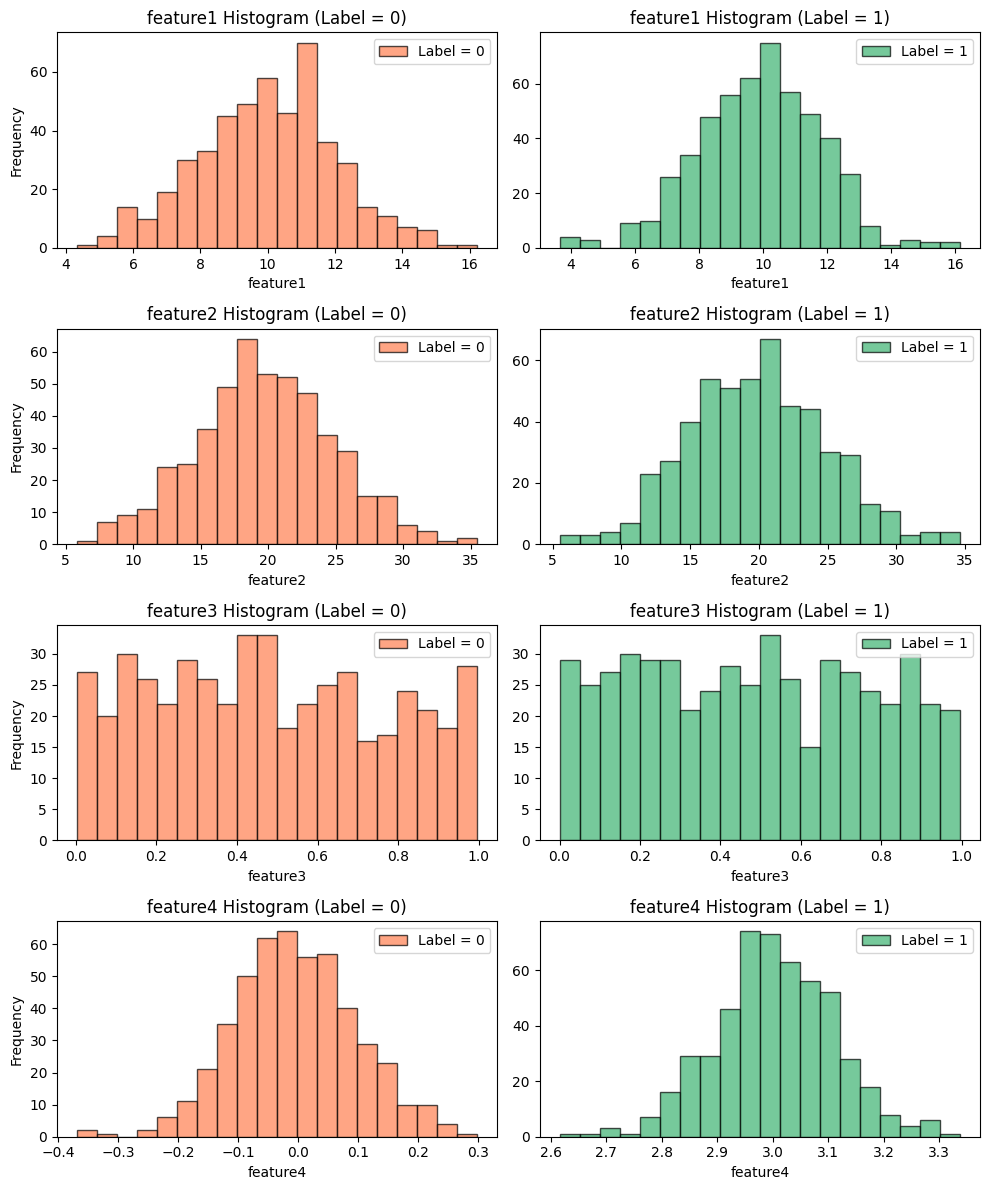

In [197]:
features = ['feature1', 'feature2', 'feature3', 'feature4']

# Create subplots: 4 rows (one for each feature) and 2 columns (label=0 and label=1)
fig, axs = plt.subplots(len(features), 2, figsize=(10, 12))

for i, feature in enumerate(features):
    # Filter data for label = 0 and label = 1
    feature_label_0 = dataset[dataset['label'] == 0][feature]
    feature_label_1 = dataset[dataset['label'] == 1][feature]

    # Plot histogram for label = 0
    axs[i, 0].hist(feature_label_0, bins=20, alpha=0.7, color='coral', edgecolor='black', label='Label = 0')
    axs[i, 0].set_title(f"{feature} Histogram (Label = 0)")
    axs[i, 0].set_xlabel(feature)
    axs[i, 0].set_ylabel("Frequency")
    axs[i, 0].legend(loc="upper right")

    # Plot histogram for label = 1
    axs[i, 1].hist(feature_label_1, bins=20, alpha=0.7, color='mediumseagreen', edgecolor='black', label='Label = 1')
    axs[i, 1].set_title(f"{feature} Histogram (Label = 1)")
    axs[i, 1].set_xlabel(feature)
    axs[i, 1].legend(loc="upper right")

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


###### Graph 2 - Scatter plot
The following graphs present the scatter plots, observaions of each feature by their labels. we want to visualize the data better to see the overlaps or non-overlaps and also spot outliers.

**findings**:

* The findings from the histogram graph are also seen here, feature1, feature2 and feature3 are highly overlap with the value ranges to labels (each feature values with its labels) which make them not good indicators to infere the label.

* we also see feature1 and feature2 has some anaomalies in the edges by looking at the scatter plots with eyes.

* feature4 - it's now crystal clear all the observations of label 1 are seprated from those of label 0 and it means this can indicate data leakage or a feature directly derived from the label. hence it's probably a bug and we will need to drop it.


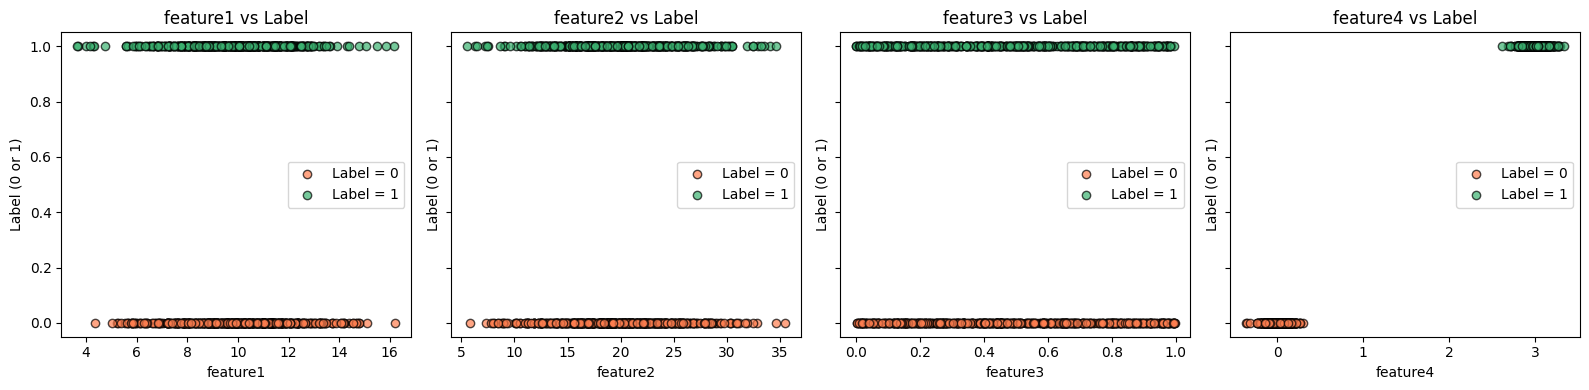

In [198]:
features = ['feature1', 'feature2', 'feature3', 'feature4']

# Create subplots: one scatter plot for each feature
fig, axs = plt.subplots(1, len(features), figsize=(16, 4), sharey=True)

colors = {0: 'coral', 1: 'mediumseagreen'}

for i, feature in enumerate(features):
    for label in [0, 1]:
        # Filter data for label and plot with custom color
        axs[i].scatter(dataset[dataset['label'] == label][feature],
                       dataset[dataset['label'] == label]['label'],
                       alpha=0.7, color=colors[label], label=f"Label = {label}", edgecolor='black')

    axs[i].set_title(f"{feature} vs Label")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Label (0 or 1)")
    axs[i].legend(loc="center right")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


###### Graph 3 - Box plot.
The following box plots visualize the distribution, spread, and outliers of each feature for the two labels (Label = 0 and Label = 1)

* The box plot shows the median (center line in the box) for each feature grouped by label.
* The box IQR represents the middle 50% of the data (from Q1 to Q3).
* The whiskers represent the range of non-outlier values.
* A larger spread indicates more variance, while a smaller spread indicates more consistency.
* Points outside the whiskers are identified as outliers.

**Findings**:
* **Feature1** - Similar medians (~10), overlapping IQRs, and similar whiskers indicate high overlap between labels.
A few outliers exist for both labels.
Feature 1 has weak discriminative power since the distributions for Label 0 and Label 1 are almost identical.

* **Feature2** - Similar medians (~20), overlapping IQRs, and similar whiskers indicate high overlap between labels.
A few outliers exist for both labels.
Like Feature 1, Feature 2 also shows weak separation between labels and may not contribute much on its own.

* **Feature3** - Both labels have almost identical medians (~0.5) and overlapping IQRs.
The whiskers extend across the entire range of the feature (0 to 1), with no visible outliers. The uniform distribution of Feature 3, as seen in earlier plots, is confirmed here.

* **Feature4** - Label 0 is tightly centered around 0.0 with a narrow spread and no overlap with Label 1. Label 1 is tightly centered around 3.0 also with a narrow spread.
There is no overlap between the boxes for Label 0 and Label 1.
Feature 4 is a strong discriminator between the labels, but its perfect separation raises concerns about data leakage or whether the feature is derived directly from the label, hence as we said above we will drop it.

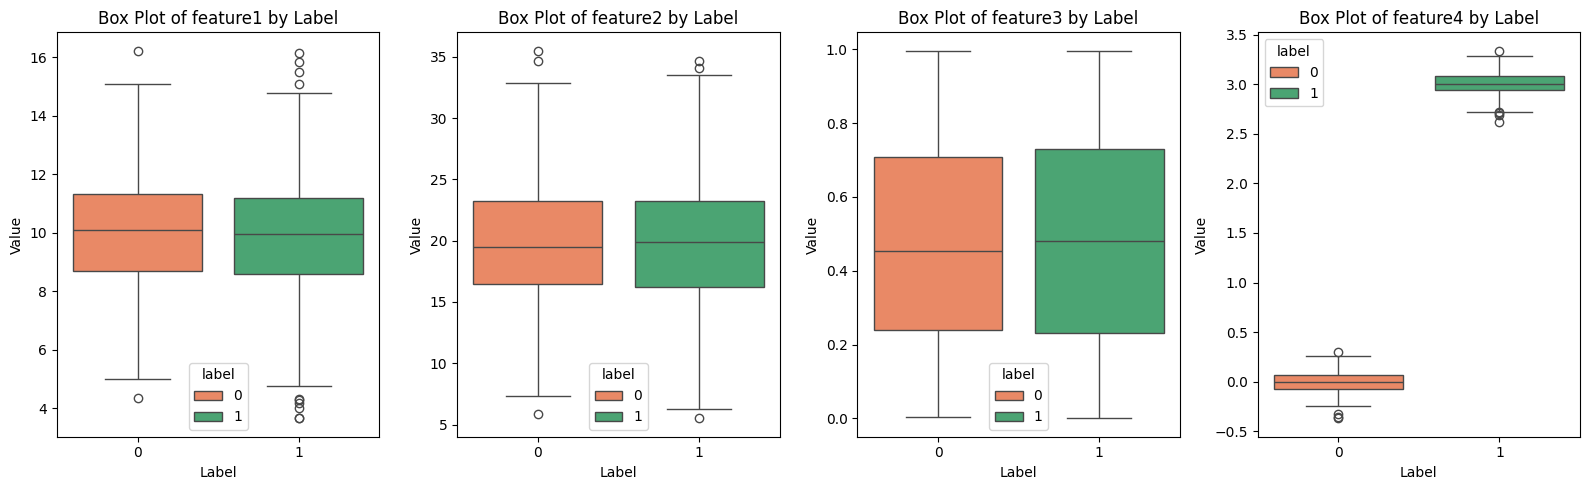

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features
features = ['feature1', 'feature2', 'feature3', 'feature4']

# Create subplots: one box plot per feature
fig, axs = plt.subplots(1, len(features), figsize=(16, 5), sharey=False)

# Loop through features and create a box plot for each
for i, feature in enumerate(features):
    sns.boxplot(x='label', y=feature, hue="label", data=dataset, ax=axs[i], palette={0: 'coral', 1: 'mediumseagreen'})
    axs[i].set_title(f"Box Plot of {feature} by Label")
    axs[i].set_xlabel("Label")
    axs[i].set_ylabel("Value")

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


###### Correlation Matrix
The correlation matrix gives us insight into the linear relationships between features and their correlation with the label

**Findings**:
* Features 1,2,3,4 have very low correlations with each other.
* Features 1,2,3 have very weak correlations with the label.
* Suggests these features might not be very useful for prediction.
* The perfect correlation between feature4 and label (1.00) is suspicious, as we saw before this could indicate:
  * Data leakage.
  * Feature4 might be derived from the label.
  * Feature4 might be too perfect a predictor.

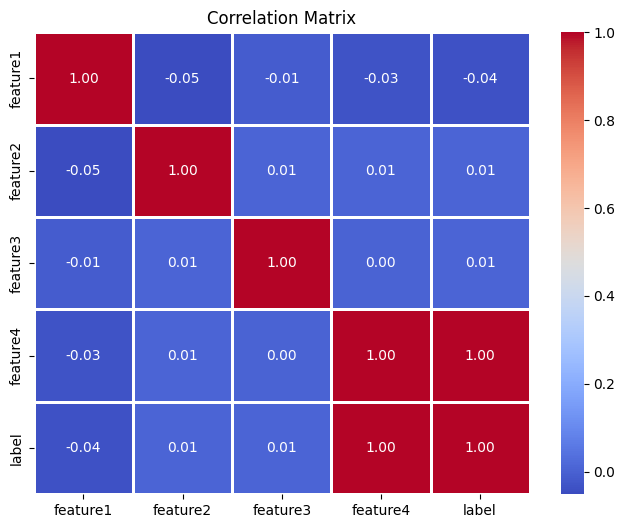

In [200]:
# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title("Correlation Matrix")
plt.show()


### 2. Feature Engineering
- Split data (train, validation, test).
- Identify and handle anomalies.
- Feature scaling.

##### Feature Engineering Utils Module
This module includes 4 helpers:
- get_outlier_bounds - to identify the upper and lower whiskers based on training set.
- split_dataset - a wrapper to sklearn spit_train_test the also excludes given features so we can experiment multiple combinations.
- handle_anomalies - a helper that finds the anomalies the above the upper bound (Q3 + 1.5 * IQR) and below the lower bound (Q1 - 1.5 * IQR) and clip those values.
- scale_data - standardizes the data by centering it and scaling it to unit variance based on training set.


In [201]:
""" Feature Engineering Utils """

def get_outlier_bounds(df, feature):
    """ # Function to calculate outlier bounds based on IQR """

    Q1 = df[feature].quantile(0.25)  # 25th percentile
    Q3 = df[feature].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

def split_dataset(dataset, excluded_columns=["feature4"]):
    """ Split dataset wrapper with excluded columns """

    cleaned_dataset = dataset.drop(excluded_columns, axis=1)
    X = cleaned_dataset.drop('label', axis=1)
    y = cleaned_dataset['label']

    # Split out the training data
    X_train, X_rem, y_train, y_rem = train_test_split(
        X, y, train_size=0.7, random_state=42
    )

    # Split the remaining data equally into validation and test
    X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test

def handle_anomalies(X_train, X_val, X_test):
    """ Clip outliers for each feature """

    for feature in ["feature1", "feature2"]:
        # Calculate bounds based on training data
        lower_bound, upper_bound = get_outlier_bounds(X_train, feature)

        # Clip outliers in each dataset
        X_train[feature] = X_train[feature].clip(lower=lower_bound, upper=upper_bound)
        X_val[feature] = X_val[feature].clip(lower=lower_bound, upper=upper_bound)
        X_test[feature] = X_test[feature].clip(lower=lower_bound, upper=upper_bound)

    return X_train, X_val, X_test

def scale_data(X_train, X_val, X_test):
    """ Scale the features, using standard scaler"""

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_val_scaled, X_test_scaled

In [202]:
# Apply split
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(dataset)
# Handle anomalies
X_train, X_val, X_test = handle_anomalies(X_train, X_val, X_test)
# Scale features
X_train_scaled, X_val_scaled, X_test_scaled = scale_data(X_train, X_val, X_test)


# Display the shpape of each group to make sure distribution makes sense
X_train_scaled.shape, X_val_scaled.shape, X_test_scaled.shape

((700, 3), (150, 3), (150, 3))

### 3. Model implementation - baseline
We have implemented a wrapper class for KNN classifier for useability purposes.
First we use it as a baseline with default hyper parmeters and measure it on validation set.

In [203]:
class KNNClassifierWrapper:
    def __init__(self, n_neighbors=5, metric="euclidean"):
        self.clf = KNeighborsClassifier(n_neighbors=n_neighbors, metric= metric)

    def fit(self, X, y):
        self.clf.fit(X, y)

    def predict(self, X):
        return self.clf.predict(X)

In [204]:
# Instanciate the KNN wrapper
clf = KNNClassifierWrapper(n_neighbors=5)

# Train the KNN model
clf.fit(X_train_scaled, y_train)

# Predict on training and validation sets
y_train_pred = clf.predict(X_train_scaled)
y_val_pred = clf.predict(X_val_scaled)

# Evaluate the model on training and validation sets before hyperparams tuning
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Validation Accuracy: {val_accuracy:.2f}")


Training Accuracy: 0.69
Validation Accuracy: 0.45


##### Note: We can see there's a gap between the training and validation accuracy which may indicate for overfitting for small k value. in the next chapter we will run experiment with different hyper parameters to enhance the performance.

### 4. Experiments
In this chapter we will run 2 experiments to confirm our hypothesis.
- Experiment 1:
  1. Drop feature4 as we see it's derived from label or has data leakage.
  2. Find the best k (1-50) and distance metric (euclidian, manhatthan).
  3. Evaluate the model.
  4. Show metrics based on test data.
  5. Repeating Step 2 - 4 by reducing dimensionality using PCA with 1 and 2 dimensions.

- Experiment 2:
  1. Drop feature4 and feature3 as we suspect it adds noise due to its uniform distribution.
  2. Find the best k (1-50) and distance metric (euclidian, manhatthan).
  3. Evaluate the model.
  4. Show metrics based on test data.
  5. Repeating Step 2 - 4 by reducing dimensionality using PCA with 1 dimension.

##### Experiment Utils Module
The module includes 1 helper find_best_k that loops over a predefined range of n neighbors, in our case 1-50 with distance metric combinations. and for each distance metric picks the k with the highest validation accuracy. it will also plots a graph so we can make sure the selected k does not underfits or overfits and is stable among the graph.


In [205]:
""" Experiment Utils Module """

hyper_params_opts = {
    'n_neighbors': range(1,50,1),  # Range of k values to test
    'metric': ["euclidean", "manhattan"] # Distance metrics to test
}

def find_best_k(X_train, y_train, X_val, y_val, pca_components = None):
  """  loops over a predefined range of n neighbors, in our case 1-50 with
  distance metric combinations. """

  for dist_metric in hyper_params_opts['metric']:
    train_accuracies = []
    val_accuracies = []
    k_values = hyper_params_opts['n_neighbors']
    for k in k_values:
        clf = KNNClassifierWrapper(n_neighbors=k, metric=dist_metric)
        clf.fit(X_train, y_train)
        train_accuracies.append(accuracy_score(y_train, clf.predict(X_train)))
        val_accuracies.append(accuracy_score(y_val, clf.predict(X_val)))

    # Plot training and test accuracies
    plt.figure(figsize=(12, 6))
    plt.plot(k_values, train_accuracies, label="Training Accuracy", marker='o')
    plt.plot(k_values, val_accuracies, label="Validation Accuracy", marker='o')
    pca_title = f"PCA Components: {pca_components}" if pca_components else ""
    plt.title(f"{pca_title} Training vs Validation Accuracy for k Values, Metric {dist_metric}")
    plt.xlabel("Number of Neighbors (k)")
    plt.ylabel("Accuracy")
    plt.xticks([k for k in k_values if k % 2 == 0])
    plt.legend()
    plt.grid()
    plt.show()

##### 4.1 Experiment 1 (exclude feature4)

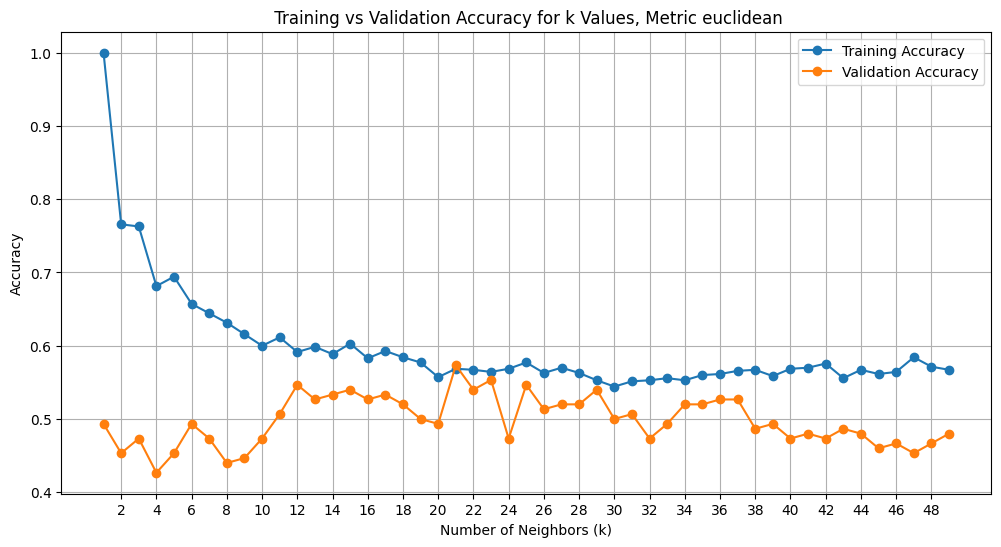

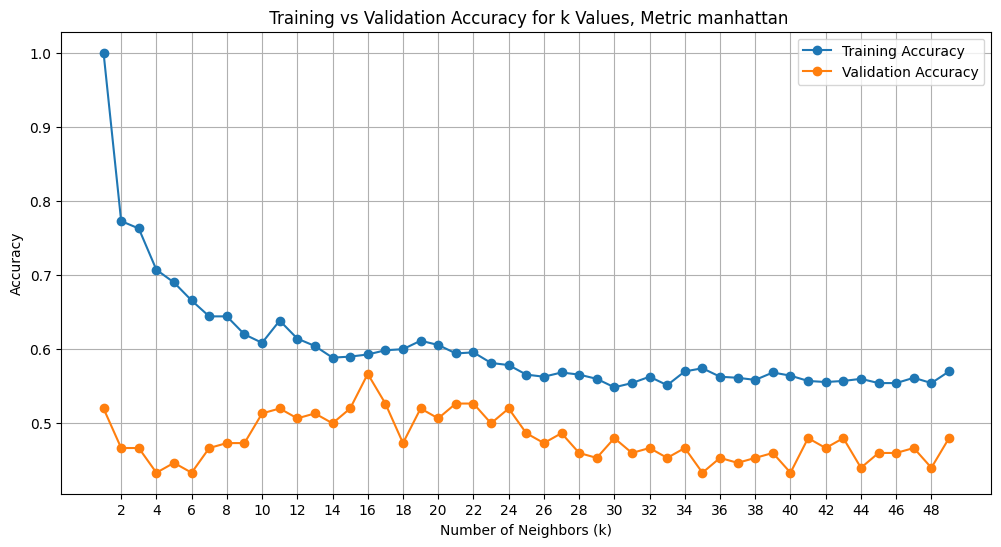

In [206]:
# Apply split
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(dataset, excluded_columns=["feature4"])
# Handle anomalies
X_train, X_val, X_test = handle_anomalies(X_train, X_val, X_test)
# Scale features
X_train_scaled, X_val_scaled, X_test_scaled = scale_data(X_train, X_val, X_test)
# Find the best k
find_best_k(X_train_scaled, y_train, X_val_scaled, y_val)

###### Evaluations on validation data (without PCA)

- Accuracy: Both metrics, Euclidean and Manhattan, show that the training accuracy is initially very high for small 𝑘 values (overfitting behavior) and decreases as 𝑘 increases, eventually stabilizing.
The training accuracy stabilizes at around. The validation accuracy is low for small 𝑘 values (overfitting) but increases until it peaks and somewhat stabilizes as 𝑘 grows, however it's less stable and performance fluctuates as 𝑘 increases.

- Euclidean vs. Manhattan: The validation accuracy for the Euclidean metric is more stable and consistently higher across different 𝑘 values compared to Manhattan.
For Manhattan, the gap between training and validation is wider suggests more overfitting.

- Pick Euclidean as the metric:
It shows more stable and slightly better validation performance overall.

- Pick best k:
The goal is to find the value of 𝑘 where validation accuracy is maximized without the model overfitting the training data.
Looking at this graph with Euclidean metric, I would choose k=12-17 and not 21 altough it reaches the highest validation accuracy because of multiple factors:
    - Training accuracy has decreased enough to avoid severe overfitting.
    - Gap between training and validation is reasonable.
    - The model seems most balanced at this point.
    - After k=15, performance becomes more volatile.
    - The area around k=21 shows high variance/instability
    - The more stable performance around k=12-15 suggests better generalization ability, even if the peak accuracy is slightly lower than k=21.

###### Display metrics (test data)

Test Accuracy: 0.52

Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.54      0.54        80
           1       0.49      0.50      0.49        70

    accuracy                           0.52       150
   macro avg       0.52      0.52      0.52       150
weighted avg       0.52      0.52      0.52       150



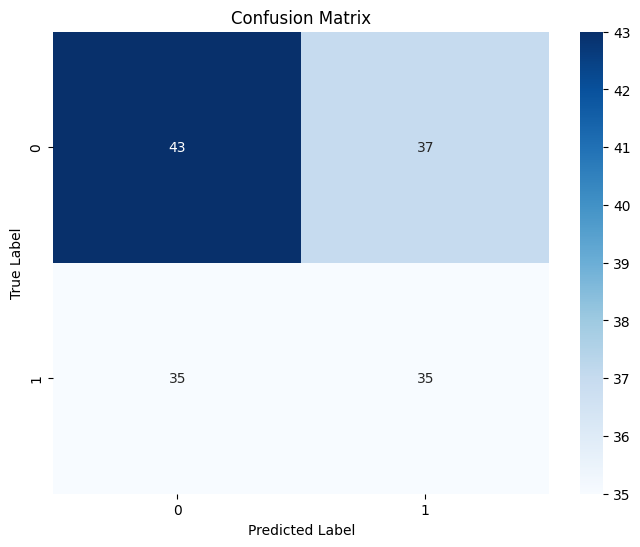

In [207]:
# Instanciate the KNN wrapper
clf = KNNClassifierWrapper(n_neighbors=14)

# Train the KNN model based on selected k
clf.fit(X_train_scaled, y_train)

# Predict based on test data
y_test_pred = clf.predict(X_test_scaled)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print("\nConfusion Matrix:")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,
            annot=True,           # Show numbers in cells
            fmt='d',              # Format as integers
            cmap='Blues',         # Color scheme
            cbar=True)          # Show color bar

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

###### Conclusion:
- we can see that the selected k = 14 yields similar accuracy to the expcped one from the validation set, which mean we did a good selection of k. however the model is underperforming and lacks the ability to differentiate well between the two classes. we could estimate this behavior based on our noisy data.

###### Repeat experiment 1 with PCA

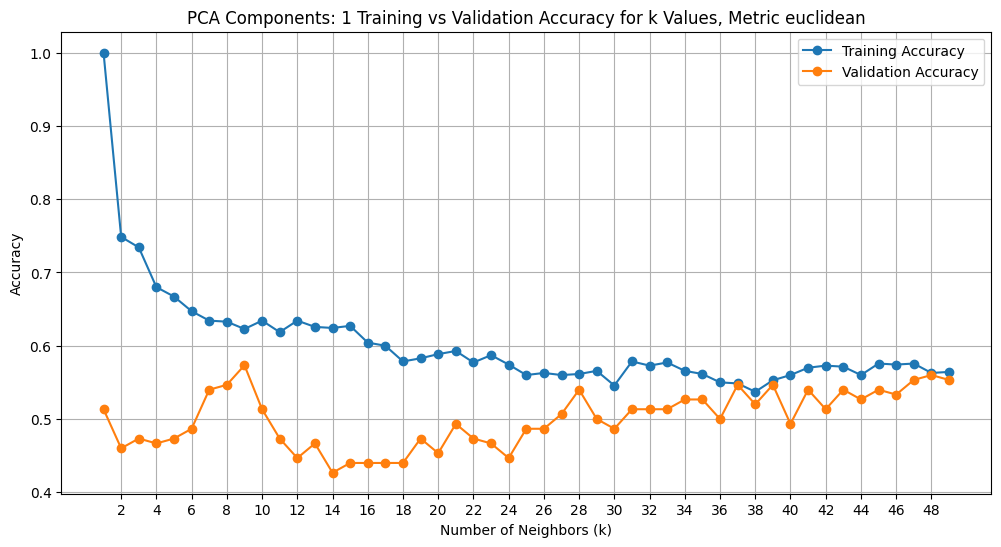

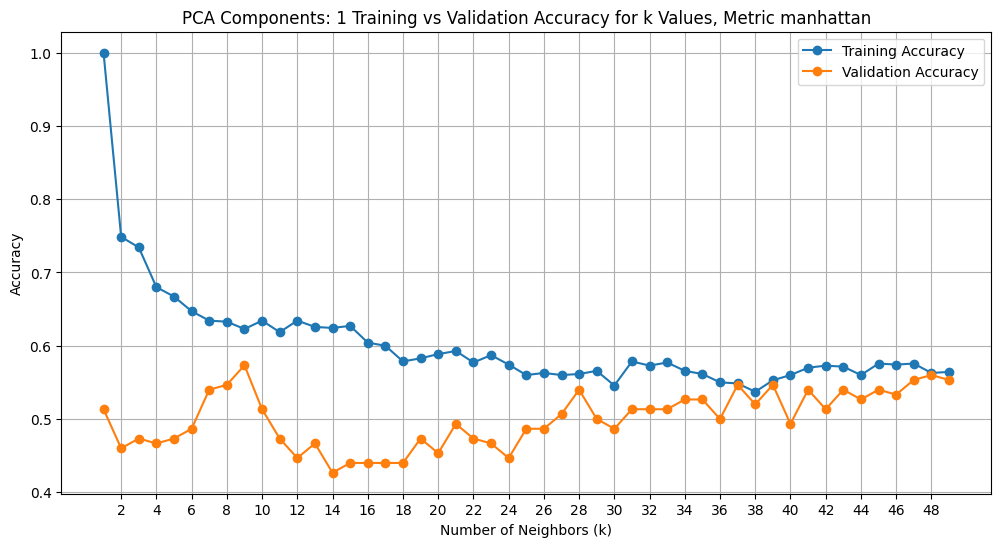

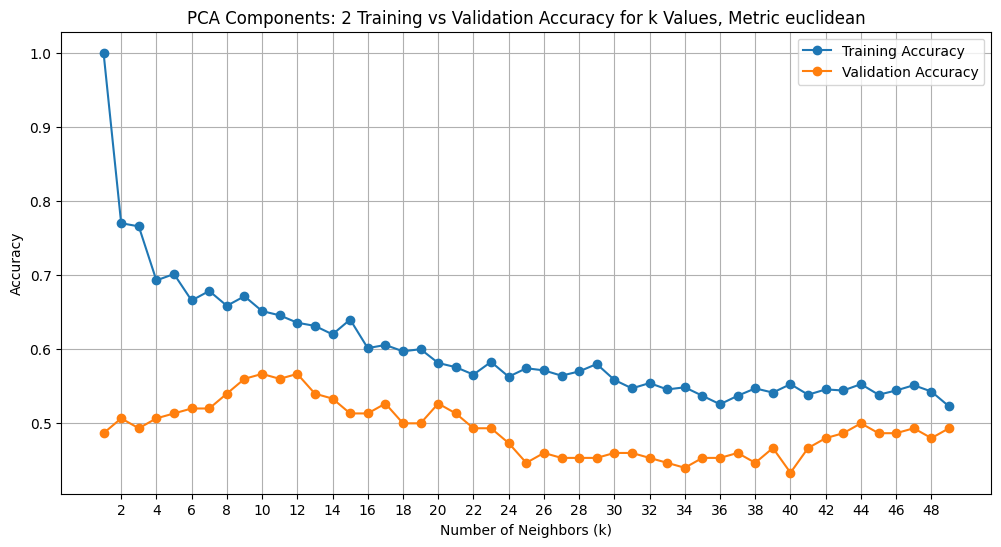

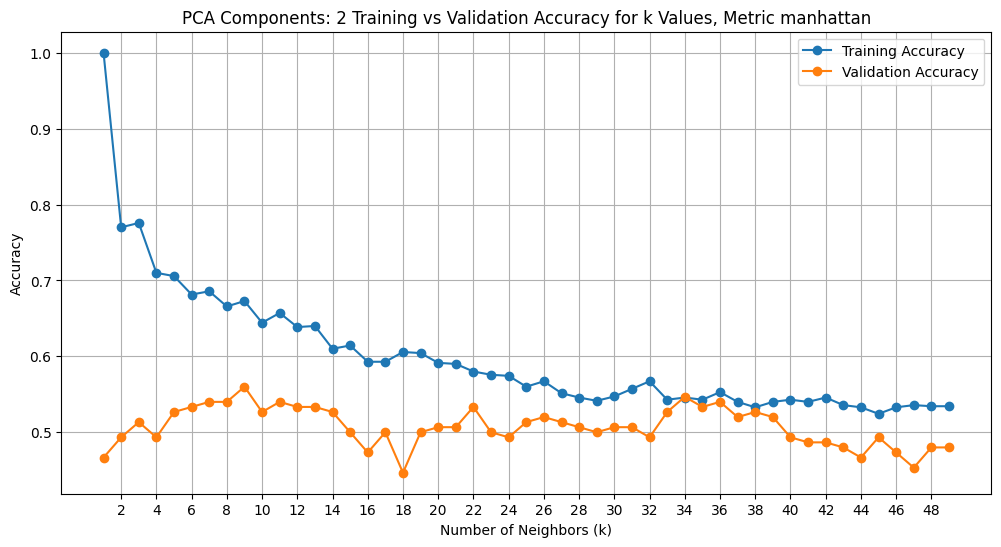

In [208]:
# Reduce dimensions to 2 and 1
for dims in range(1,3):
  pca = PCA(n_components=dims)
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_val_pca = pca.transform(X_val_scaled)

  find_best_k(X_train_pca, y_train, X_val_pca, y_val, pca_components=dims)

###### Evaluations on validation data (with PCA)

1. First and second graph PCA = 1, distance metrics = euclidian, manhatthan yields same results exactly because in 1 dimension the euclidian distance equals to manhtthan distance. we see that in those graphs there's a pick at k = 9 and then the training and validation accuracy drops and remains in overfit until ~*k* = 25. then it stabelize but the accuracy of both is not as higher as it used to be.

2. in the second graph of PCA = 2, distance = euclidian the gap is wide between training and validation for each k but the very large ones where the training accuracy decreases, suggests semi overfit.

3. for last graph manhattan with PCA = 2, it takes the model time to fit at about k = 26, but then it's still not stable and the training accuracy decreases.

for this reason we will select model 1 (PCA = 1, metric = euclidian) and k = 9.

Test Accuracy: 0.54

Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.47      0.52        80
           1       0.51      0.61      0.55        70

    accuracy                           0.54       150
   macro avg       0.55      0.54      0.54       150
weighted avg       0.55      0.54      0.54       150



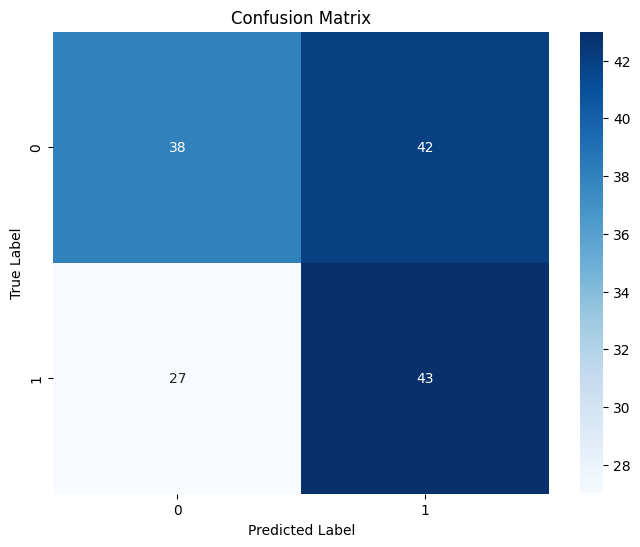

In [209]:
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Instanciate the KNN wrapper
clf = KNNClassifierWrapper(n_neighbors=9)

# Train the KNN model based on selected k
clf.fit(X_train_pca, y_train)

# Predict based on test data
y_test_pred = clf.predict(X_test_pca)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print("\nConfusion Matrix:")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,
            annot=True,           # Show numbers in cells
            fmt='d',              # Format as integers
            cmap='Blues',         # Color scheme
            cbar=True)          # Show color bar

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

##### Conclusion (experiment 1 with PCA)
The pca reduction helped but not dramatically,

##### 4.2 Experiment 2 (exclude feature3, feature4)

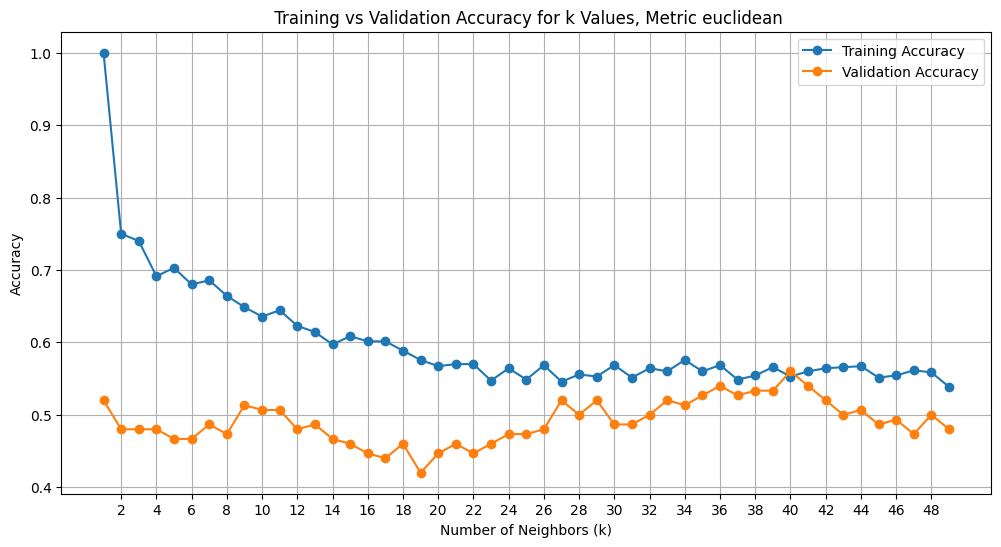

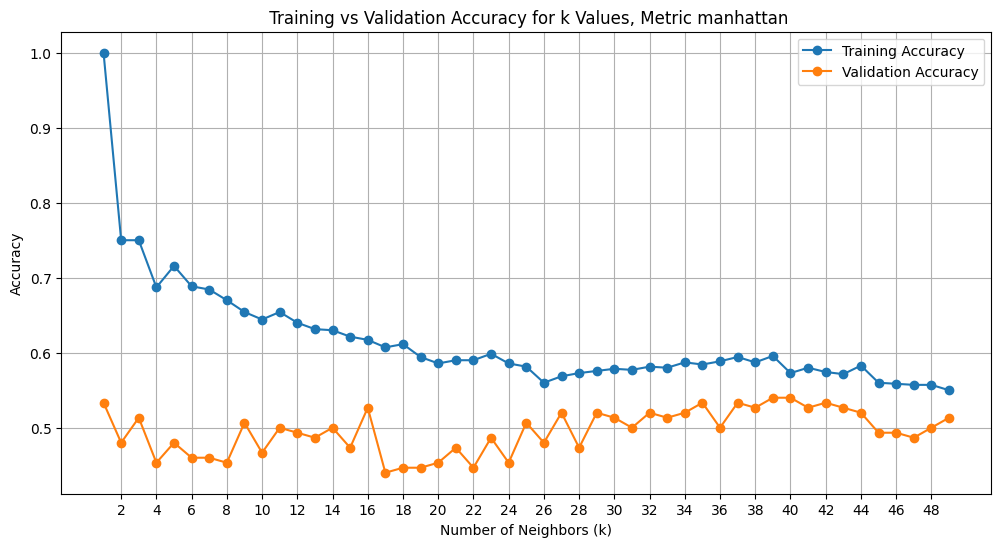

In [210]:
# Apply split
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(dataset, excluded_columns=["feature3", "feature4"])
# Handle anomalies
X_train, X_val, X_test = handle_anomalies(X_train, X_val, X_test)
# Scale features
X_train_scaled, X_val_scaled, X_test_scaled = scale_data(X_train, X_val, X_test)
# Find the best k
find_best_k(X_train_scaled, y_train, X_val_scaled, y_val)

Evaluation without PCA: Viweing the graph we don't see a dramtic different after removing feature3 as well, actually choosing the k is even harder now. cause the graphs do not peak at lower k's and in higher k's the graphs are voltile. however we see we can find a k with about the same accuracy. hence we will move to next check with PCA.

###### Experiment 2 (exclude features3, features4) with PCA

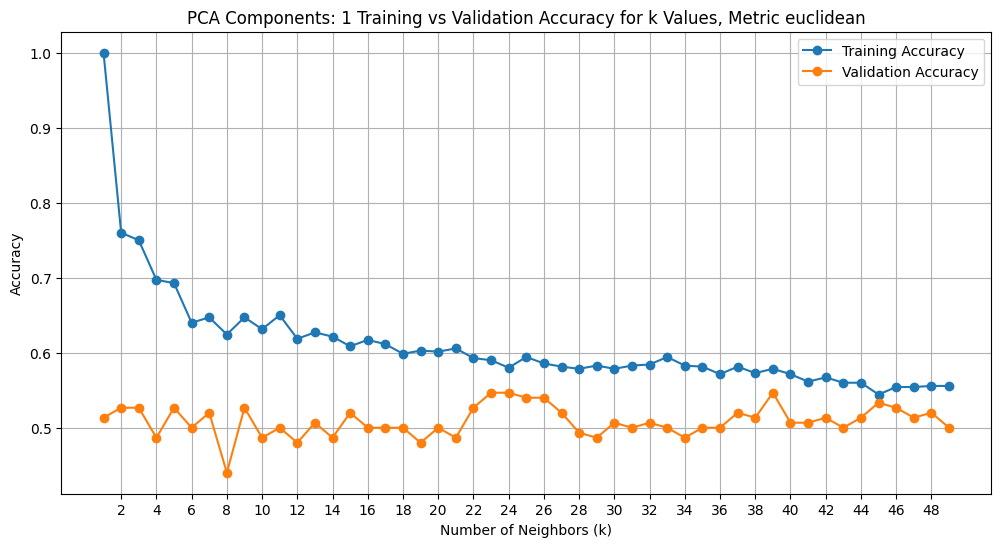

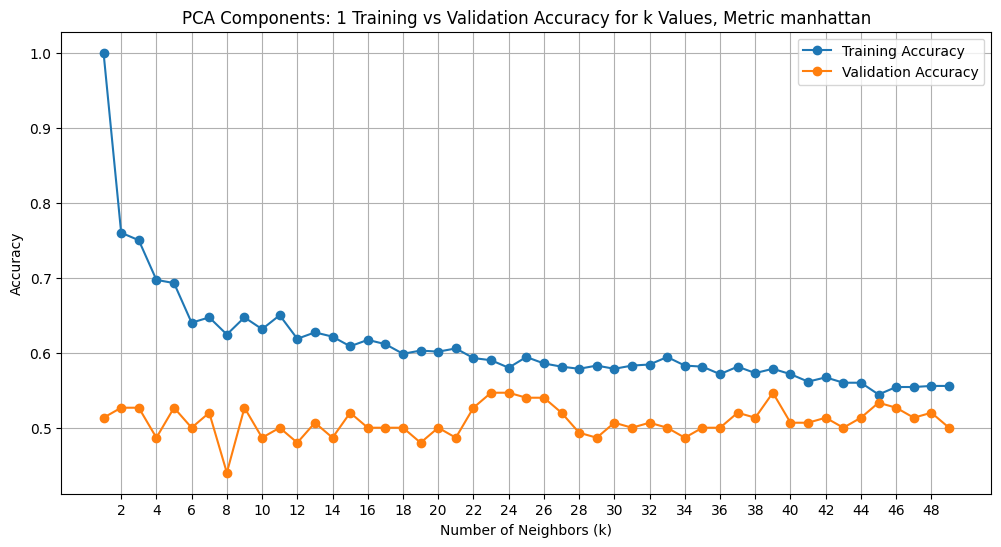

In [211]:
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

find_best_k(X_train_pca, y_train, X_val_pca, y_val, pca_components=1)

###### Evaluation with PCA:
We see that after PCA reduction from 2 features (feature1, feature2) to 1 dimension, the graphs fit around k= 22-26. hence we will select k = 23.

###### Display test metrics (PCA=1, exclude feature3, feature4)

Test Accuracy: 0.55

Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.51      0.55        80
           1       0.52      0.60      0.56        70

    accuracy                           0.55       150
   macro avg       0.56      0.56      0.55       150
weighted avg       0.56      0.55      0.55       150



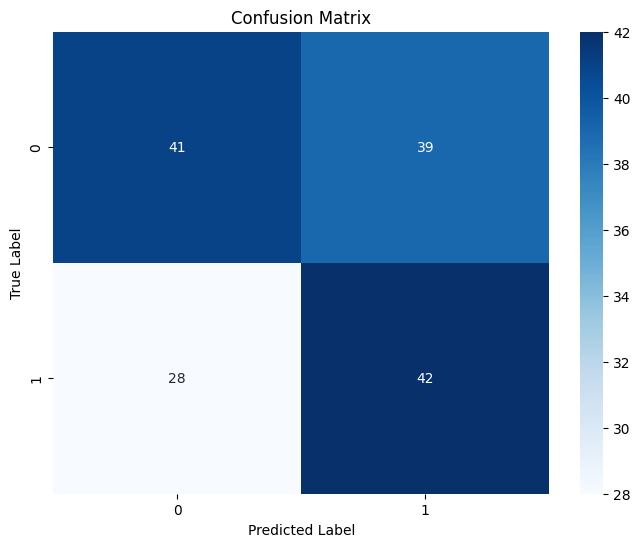

In [212]:
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Instanciate the KNN wrapper
clf = KNNClassifierWrapper(n_neighbors=23)

# Train the KNN model based on selected k
clf.fit(X_train_pca, y_train)

# Predict based on test data
y_test_pred = clf.predict(X_test_pca)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print("\nConfusion Matrix:")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,
            annot=True,           # Show numbers in cells
            fmt='d',              # Format as integers
            cmap='Blues',         # Color scheme
            cbar=True)          # Show color bar

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

###### Conclusion
We got the best result in terms of accuracy on test data - 0.55 using feature1 and feature2 with PCA = 1. also the f1 score is the highest. however the model still doesn't perform well and the imperovment is just by a little because of the un-corralted dataset.

### 5. Summary

1. Key Insights from Data Exploration:
- Feature 4 showed perfect correlation (1.0) with the label,raising concerns about potential data leakage.
- Features 1, 2, and 3 had very weak correlations with the label.
- All features were independent of each other (low inter-feature correlations).
- Feature3: Uniform distribution with almost no separation between labels, suggesting minimal predictive power and add noise.

2. Anomalies and Their Handling:
- Feature 4: Its extreme correlation with the label suggests it might leak information hence we droped it.
- Its uniform distribution indicates it might not contribute significantly to the model's prediction, hence we performed 2 experiments with and without this feature.
- Feature1 & Feature2: Outliers detected using the IQR method and clipped based on the bounds calculated from the training set.
- PCA was used to handle potential noise and reduce dimensionality.

3. Best k value Model Performance:
- PCA with 1 component
- k = 23 neighbors
- Euclidean distance
- Features: feature1, feature2
- accuracy: 0.55
- f1 score: label_0 0.55, label_1 0.56

The inclusion of PCA improved the model's validation accuracy by approximately 0.03, showing slight benefits in dimensionality reduction, but not dramatic.
which makes sense cause the reduction of dimension is very little.
in addition The model's performance suggests the features might not be strongly predictive of the target variable.

